In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
learned_features_train = [np.load("output_data/MLP/train_inter_outputs_{}.npy".format(i)) for i in range(1, 11)]
learned_features_test = [np.load("output_data/MLP/test_inter_outputs_{}.npy".format(i)) for i in range(1, 11)]

In [82]:
labels = [np.load("output_data/MLP/y_test_{}.npy".format(i)) for i in range(1, 11)]

In [83]:
labels[0].shape

(134,)

In [84]:
pcas = [PCA(n_components = 2) for i in range(10)]
pcas = [pcas[i].fit(X = learned_features_train[i]) for i in range(10)]

In [85]:
transforms = [pcas[i].transform(learned_features_test[i]) for i in range(10)]

In [86]:
neg_idx = [np.where(labels[i] == 0)[0] for i in range(10)]
pos_idx = [np.where(labels[i] == 1)[0] for i in range(10)]

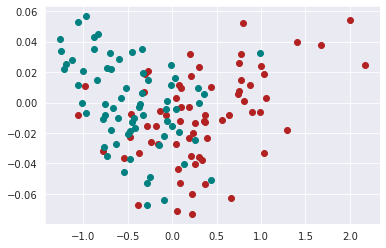

In [87]:
plt.scatter(transforms[0][pos_idx[0], 0], transforms[0][pos_idx[0], 1], color = "firebrick")
plt.scatter(transforms[0][neg_idx[0], 0], transforms[0][neg_idx[0], 1], color = "teal")

In [88]:
transforms[0].shape

(134, 2)

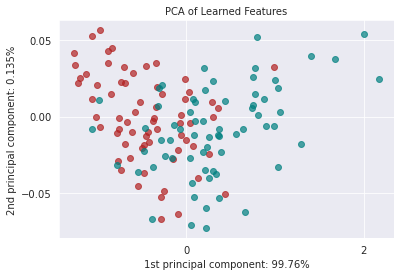

In [135]:
#plt.rcParams['savefig.facecolor'] = "0.8"

sns.set_style("darkgrid")

def example_plot(ax, shuffle_idx, fontsize = 12):
    ax.scatter(transforms[shuffle_idx][neg_idx[shuffle_idx], 0], transforms[shuffle_idx][neg_idx[shuffle_idx], 1], color = "firebrick", alpha = 0.7)
    ax.scatter(transforms[shuffle_idx][pos_idx[shuffle_idx], 0], transforms[shuffle_idx][pos_idx[shuffle_idx], 1], color = "teal", alpha = 0.7)

    ax.locator_params(nbins = 3)
    ax.set_xlabel('1st principal component: {0:.4g}%'.format(pcas[shuffle_idx].explained_variance_ratio_[0] * 100), fontsize = fontsize)
    ax.set_ylabel('2nd principal component: {0:.4g}%'.format(pcas[shuffle_idx].explained_variance_ratio_[1] * 100), fontsize = fontsize)
    ax.set_title("PCA of Learned Features", fontsize = fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, shuffle_idx = 0, fontsize = 10)

<ipython-input-108-adcc9b43ce04>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


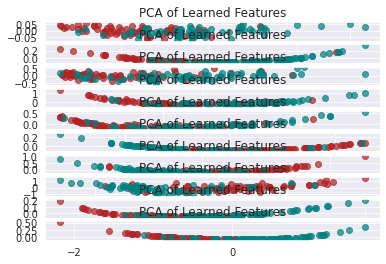

In [108]:
fig.set_figheight(15)
fig.set_figwidth(50)

fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows = 10, ncols = 1)
example_plot(ax1, shuffle_idx = 0)
example_plot(ax2, shuffle_idx = 1)
example_plot(ax3, shuffle_idx = 2)
example_plot(ax4, shuffle_idx = 3)
example_plot(ax5, shuffle_idx = 4)
example_plot(ax6, shuffle_idx = 5)
example_plot(ax7, shuffle_idx = 6)
example_plot(ax8, shuffle_idx = 7)
example_plot(ax9, shuffle_idx = 8)
example_plot(ax10, shuffle_idx = 9)
plt.tight_layout()

In [122]:
pcas[0].explained_variance_

array([0.7074948 , 0.00095773], dtype=float32)

In [125]:
pca_ = PCA()
pca_.fit(learned_features_train[0])
sum(pca_.explained_variance_ratio_)

1.0000000240969154